In [1]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Min and max temperature')

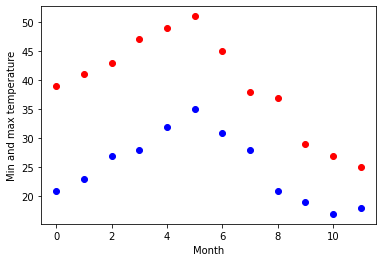

In [17]:
plt.scatter(x = [i for i,j in enumerate(Max)], y = Max, c = 'red')
plt.scatter(x = [i for i,j in enumerate(Min)], y = Min, c = 'blue')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [15]:
from scipy import optimize
import numpy as np
def yearly_temp(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
months = np.arange(12)
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min, [-40, 20, 0])

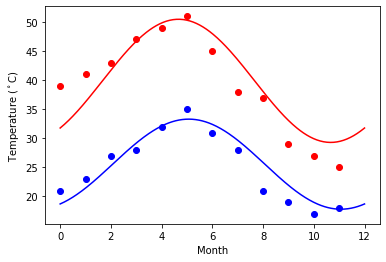

In [16]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [21]:
df.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [22]:
df.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [30]:
df.sex.value_counts()[0]

844

# Since Male counts are more than female counts, imputing missing values with Male class

In [27]:
df.sex.fillna('male', inplace=True)

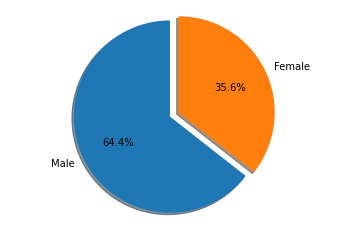

In [32]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [df.sex.value_counts()[0], df.sex.value_counts()[1]]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [53]:
df.describe(exclude=['O'])

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [52]:
df[df.age.isna() == True]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1.0,0.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0.0,0.0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1.0,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3.0,0.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN


In [33]:
df[df.fare.isna() == True]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN
1309,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
from sklearn.impute import SimpleImputer

In [39]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [54]:
sub_df = df.loc[:,['fare','sex', 'age']]
sub_df

,fare,sex,age
0,211.3375,female,29.0000
1,151.5500,male,0.9167
2,151.5500,female,2.0000
3,151.5500,male,30.0000
4,151.5500,female,25.0000
...,...,...,...
1305,14.4542,female,NaN
1306,7.2250,male,26.5000
1307,7.2250,male,27.0000
1308,7.8750,male,29.0000


In [59]:
from sklearn.compose import ColumnTransformer

In [60]:
ct = ColumnTransformer([('imputer', imp, [0,2])])

In [62]:
tf_df = ct.fit_transform(sub_df)

In [67]:
tf_df = pd.DataFrame(tf_df).rename(columns={0:'fare', 1:'age'})
tf_df

,fare,age
0,211.337500,29.000000
1,151.550000,0.916700
2,151.550000,2.000000
3,151.550000,30.000000
4,151.550000,25.000000
...,...,...
1305,14.454200,29.881135
1306,7.225000,26.500000
1307,7.225000,27.000000
1308,7.875000,29.000000


In [68]:
tf_df['sex'] = sub_df.sex

In [69]:
tf_df

,fare,age,sex
0,211.337500,29.000000,female
1,151.550000,0.916700,male
2,151.550000,2.000000,female
3,151.550000,30.000000,male
4,151.550000,25.000000,female
...,...,...,...
1305,14.454200,29.881135,female
1306,7.225000,26.500000,male
1307,7.225000,27.000000,male
1308,7.875000,29.000000,male


In [71]:
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


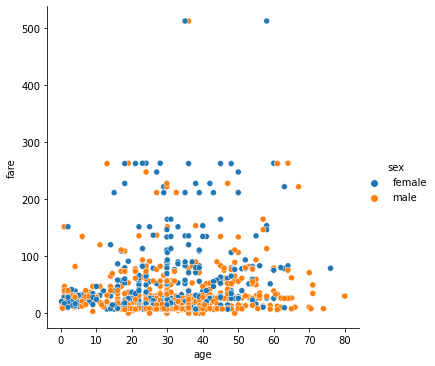

In [74]:
sns.relplot('age','fare',  hue = 'sex', data = tf_df, kind = 'scatter')